# RESTRICTED BOLTZMANN MACHINES (RBMs)

Le **Restricted Boltzmann Machines (RBMs)** sono un tipo di rete neurale probabilistica utilizzata in unsupervised learning, specialmente per compiti come feature learning (ovvero carpire caratteristiche e pattern ignoti dai dati) e generative learning.

Le RBM sono una variante delle Boltzmann Machines, con la restrizione che i neuroni sono organizzati in due strati distinti (visibile e nascosto) senza connessioni intra-strato. Questa struttura semplifica il calcolo delle probabilità condizionate, rendendo il campionamento più efficiente rispetto alle Boltzmann Machines generiche.

Dal punto di vista teorico, le RBM sono strettamente legate al principio della Massima Entropia (MaxEnt), che afferma che, in assenza di conoscenza specifica, la distribuzione di probabilità più adeguata è quella che massimizza l'entropia soggetta ai vincoli osservati. Le RBM apprendono una distribuzione che massimizza l’entropia (e quindi minimizza l'energia) sotto il vincolo di mantenere le statistiche dei dati, rendendole simili ai modelli di Markov Random Fields con interazioni apprese.

Il loro addestramento avviene tipicamente tramite Contrastive Divergence (CD), un’euristica per stimare il gradiente della funzione di costo senza calcolare esplicitamente la funzione di partizione, che sarebbe computazionalmente proibitiva.

Esse quindi sono composte da due soli strati di neuroni:
* **Strato visibile** $v = (v_1, v_2, \dots, v_m)$, composto da $m$ neuroni, che è l'input layer, ovvero m coincide con il numero di features di un dato x
* **Strato nascosto** $h = (h_1, h_2, \dots, h_n)$, composto da $n$ neuroni, che è l'hidden layer e rappresenta le caratteristiche/pattern/correlazioni nascoste nei dati.

Ogni unità (neurone), visibile o nascosta, può assumere valori binari che sono 0,1 (caso Bernoulli) o anche -1,1 (caso spins). (oppure reali in caso di RBM reali, più complesso).

Si consiglia di vedere [questo video](https://www.youtube.com/watch?v=_bqa_I5hNAo).

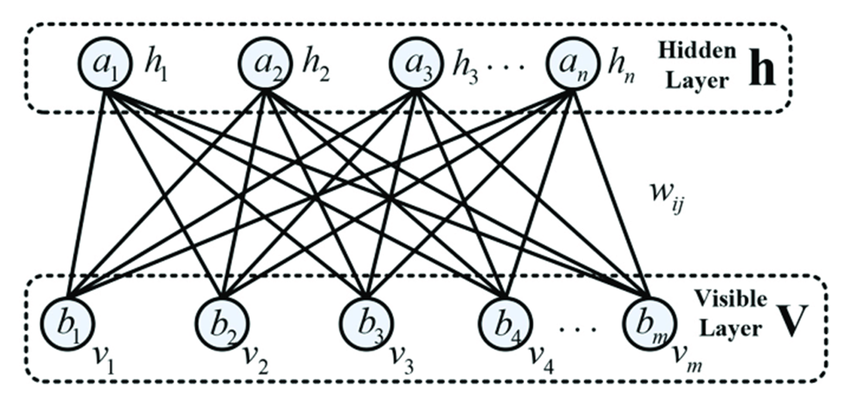

In [1]:
from IPython.display import Image, display
display(Image("./images/rbm.png"))

#### ENERGY FUCNTION
Il comportamento di una RBM è descritto dalla *funzione energia* (che sarà legata alla probabilità di avere uno stato dato dai neuroni $(v, h)$ ) associata, data da:

$$ E(v, h) = - \sum_i^m b_i v_i - \sum_j^n c_j h_j - \sum_i^m \sum_j^n v_i h_j W_{ij} $$

dove:
- $W_{ij}$ è il peso della connessione tra il neurone visibile $v_i$ e il neurone nascosto $h_j$. In totale i pesi saranno $m \cdot n$
- $b_i$ è il bias associato al neurone visibile $v_i$. In totale saranno $m$
- $c_j$ è il bias associato al neurone nascosto $h_j$. (in foto sopra denominato come $a_j$). In totale saranno $n$

#### PROBABILITY FUNCTION
La neural network assegna la probabilità di "osservare" uno stato $(v, h)$ usando la distribuzione di Boltzmann. Essa va interpretata come la probabilità di ottenere una specifica configurazione di valori di neuroni, ad esempio $v=(1,0,0,1,1....,v_m)$ e $h=(0,0,1,1,0....,h_n)$. Per ogni configurazione essa è data da:


$$ P(v, h) = \frac{e^{-E(v, h)}}{Z} , \text{with v and h vectors of neurons} $$

dove $Z$ è la funzione di partizione $ Z = \sum_v  \sum_h e^{-E(v,h)} $ che somma le probabilità di tutte le  possibili combinazioni delle configurazioni, andando quindi a normalizzare la nostra funzione di probabilità. Si noti che, poichè ogni neurone può assumere stato 0 o 1, le possibili combinazioni diventano $2^{m+n}$, un numero proibitivo da computare direttamente (come precedentemente anticipato).

OSSERVAZIONI PRATICHE: dalla formula vediamo che maggiore sarà $E(v, h)$, minore sarà la probabilità di osservare lo stato $(v, h)$. Un'altra osservazione è che se ad esempio $b_i$ è negativo, il neurone $v_i$ sarà preferito spento (=0) invece che acceso (=1), come si deduce dalla formula dell'energia (poichè altrimenti aumenterebbe l'energia). Viceversa se $b_i$ è negativo. (stesso discorso per bias e valori dell'hidden layer). Similmente se il peso $W_{ij}$ è negativo, saranno preferiti spenti sia $v_i$ che $h_i$, e viceversa. Insomma andando a variare i valori dei bias e dei pesi andremo a decidere quali neuroni avranno peso maggiore.

La probabilità assegnata ad un dato visibile $v$ è data dalla sommatoria su tutti i neuroni nascosti:

$$ P(v) = \frac{\sum_h e^{-E(v,h)}}{Z} $$

Grazie alla struttura bipartita della RBM, le probabilità condizionate si semplificano notevolmente.

Dato un insieme di neuroni visibili $v$, la probabilità di attivazione di un neurone nascosto $h_j$ è fissata con:

$$ P(h_j = 1 \mid v) = \sigma\left(\sum_i v_i W_{ij} + c_j\right) $$

dove $\sigma(x) = \frac{1}{1 + e^{-x}}$ è la funzione sigmoide.

Dato un insieme di neuroni nascosti $h$, la probabilità di attivazione di un neurone visibile $v_i$ è:

\begin{equation}
P(v_i = 1 \mid h) = \sigma\left(\sum_j h_j W_{ij} + b_i\right)
\end{equation}



#### TRAINING
Summary: RBMs are trained using Maximum Likelihood Estimation (MLE), in which the log-likelihood gradient is approximated using Gibbs sampling and gradient ascent is performed on the so-called Contrastive Divergence approximation.

L'addestramento di una RBM consiste nel trovare i parametri $W, b, c$ che minimizzano la funzione di costo data dalla *negative log-likelihood* (scelta in quasi tutti i casi di generative learning):

$$ \mathcal{L} = - \frac{1}{M} \sum_{i}^M l_{v_i} = - \frac{1}{M}\sum_{i}^M \ln P(v_i) $$

dove M è il numero di dati (ciascuno con m features) e $P$ la probabilità di Boltzmann.  
Poiché calcolare esattamente il gradiente di questa funzione è proibitivo per via della $Z$, si utilizza un'approssimazione chiamata **Contrastive Divergence (CD)**.  
Il gradiente della log-likelihood rispetto ai pesi (e similmente rispetto ai bias) è stimato come:

$$ \frac{\partial \log P(v)}{\partial W_{ij}} = \langle v_i h_j \rangle_{\text{data}} - \langle v_i h_j \rangle_{\text{model}} $$

dove:
- $\langle v_i h_j \rangle_{\text{data}}$ è la media del prodotto $v_i h_j$​ sui dati reali, ovvero su esempi di addestramento. Questo indica quanto spesso $v_i$ e $h_j$​ sono attivati insieme nei dati di input.
- $\langle v_i h_j \rangle_{\text{model}}$ è la media del prodotto $v_i h_j$​ sulle distribuzioni generate dal modello (cioè, dopo che la RBM ha appreso i parametri e genera campioni propri).

Il secondo termine è difficile da calcolare perché richiede di campionare dall'intera distribuzione del modello. Qui entra in gioco la Contrastive Divergence che approssima il secondo termine con una **catena di Gibbs** troncata (Invece di campionare esattamente da $P(v)$):

Contrastive Divergence (CD) is an approximate training technique for Restricted Boltzmann Machines (RBM). It estimates the gradient of the log-likelihood without explicitly computing the partition function $Z$, which is computationally expensive.


Computing $\langle v_i h_j \rangle_{\text{model}}$ exactly is intractable, so Contrastive Divergence approximates it using a truncated Gibbs sampling process.

Instead of sampling exactly from $P(v)$, Contrastive Divergence uses iterates k times the Gibbs sampling (see image below). Typically k is very low, like 1 or 2 (higher number of steps have high computation need but low gaining). The Gibbs chain is initialized with a training example $v^{(0)}$ and is terminated after $k$ steps, yielding a sample $v^{(k)}$ . Each step $t$ consists of a step of block Gibbs sampling, in which $h^{(t)}$ is sampled from $p(h|v^{(k)})$ (positive phase) and then $v^{(t+1)}$ is sampled from $p(v|h^{(t)})$ (negative phase). A single step is given by;


* Sample $h$ given $v$ from data (so called positive phase): $ h_j \sim P(h_j = 1 \mid v) = \sigma\left(\sum_i v_i W_{ij} + c_j\right) $
* Sample $v'$ given $h$ generated (so called negative phase): $ v_i' \sim P(v_i = 1 \mid h) = \sigma\left(\sum_j h_j W_{ij} + b_i\right)$ 
* Sample $h'$ given $v'$ reconstructed: $ h_j' \sim P(h_j = 1 \mid v') $

After a single Gibbs step, the weights are updated as:

$$  \Delta W_{ij} \propto \langle v_i h_j \rangle_{\text{data}} - \langle v_i' h_j' \rangle_{\text{reconstruction}} $$

Questa differenza ha lo scopo di ridurre la discrepanza tra la distribuzione del modello e quella dei dati reali.

  
Contrastive Divergence si basa sull'idea che anche pochi passi di Gibbs Sampling (spesso solo uno, da cui *CD-1*) sono sufficienti per spostare la distribuzione del modello nella direzione giusta. In pratica, invece di aspettare che il modello raggiunga l'equilibrio, confrontiamo direttamente i dati reali con le loro prime ricostruzioni.

Sebbene questa sia solo un'approssimazione, nella pratica funziona bene ed è molto più veloce rispetto a metodi più accurati come il Metropolis-Hastings o il full Gibbs sampling.

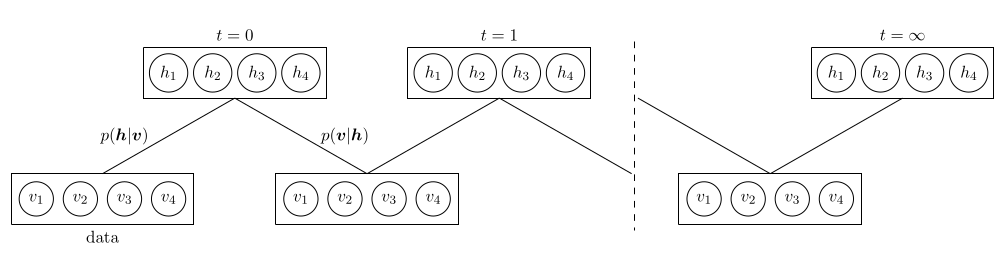

In [3]:
display(Image("./images/block_gibbs.png") )

A batch version of CD-k is shown in *Algorithm 1* below. In this case, in each step the gradient is computed using the complete training set. This is referred to as batch learning. However, when dealing with large datasets it is often more efficient to use only a subset $ S_0 \subset S $ – called mini-batch – in every iteration, reducing the computational burden. This is referred to as online learning.

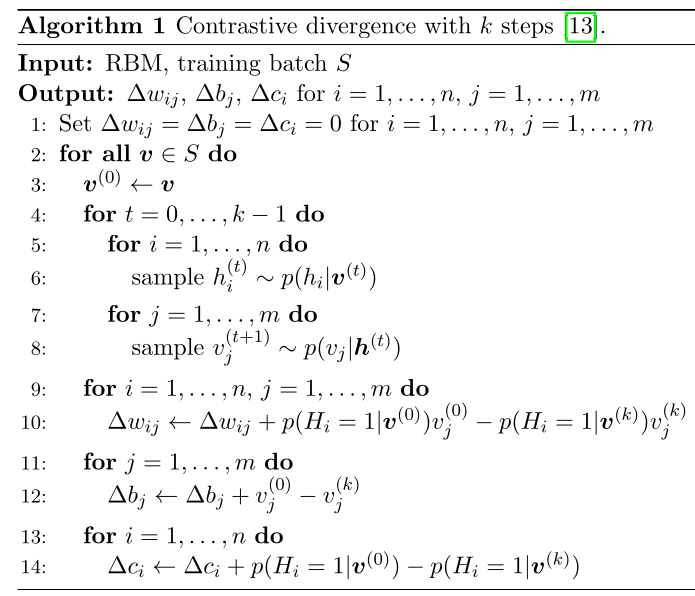

In [4]:
# PSEUDO CODE:
display(Image("./images/contrastive_divergence_pseudo.png") )

#### RIPASSO DELLA LIKELIHOOD
La likelihood di un insieme di dati $S$ esprime la probabilità di ottenere quei dati dato un modello $p$ (e i suoi parametri $\theta$).
$$ \mathcal{L} = \prod_{i=1}^M p(x_i|\theta)  $$

Viene usata ad esempio per capire se e quanto un set di dati possa provenire da una certa distribuzione di probabilità ignota $q$. Maximizing the likelihood corresponds to minimizing the distance between the unknown distribution $q$ underlying $S$ and the distribution $p$ of our model. For measuring the 'distance' between two distributions, we can use the Kullback-Leibler divergence.  
Since the logarithm is a monotonically increasing function, maximizing the likelihood is the same as maximizing the log-likelihood, which is given by:
$$ \ln \mathcal{L} = \ln \prod_{i=1}^M p(x_i|\theta) = \sum_{i=1}^M \ln p(x_i|\theta) $$

From a computational standpoint, maximizing the log-likelihood is less expensive and avoids numerical errors. However, in general it is not possible to find the maximum likelihood parameters analytically for the Boltzmann distribution of our RBM, since it requires to compute the partition function Z. Thus, we need to use numerical approximations, for example gradient ascent on the log-likelihood. This corresponds to iteratively updating the parameters $θ(t)$ to $θ(t+1)$ based on the gradient of the log-likelihood. The complete form of the update rule is the following:
$$ \theta^{(t+1)} = \theta^{(t)} + \eta \frac{\partial \ln \mathcal{L}(\theta^{(t)} | S)}{\partial \theta^{(t)}} - \lambda \theta^{(t)} + \nu \Delta \theta^{(t-1)} $$

The parameter $\eta >0$ is the learning rate, $\lambda >= 0$ is the weight decay parameter, $\nu >= 0$ is the momentum parameter and $\Delta \theta_{}^{(t-1)} $ is the gradient at step $t − 1$. If $\lambda$ and $\nu$ are set to zero, we have the vanilla gradient ascent.



DA FARE CHECK DA QUA IN POI CON PDF TESI

Usually, we are interested in the probability distribution of \( V \), which can be obtained by marginalizing over \( h \):

$$
p(v) = \sum_{h} p(v, h) = \sum_{h} \frac{e^{-E(v,h)}}{Z}
$$

where  $Z = \sum_{v,h} e^{-E(v,h)} $ is the partition function. For a model of this form the log-likelihood given a single training example $v$ is:

$$
\ln \mathcal{L} (\theta | v) = \ln p(v | \theta) = \ln \sum_{h} e^{-E(v,h)} - \ln Z = \ln \sum_{h} e^{-E(v,h)} - \ln \sum_{v,h} e^{-E(v,h)}
$$

And the gradient is:

$$ \frac{\partial \ln \mathcal{L} (\theta | v)}{\partial \theta} = \frac{\partial}{\partial \theta} \ln \sum_{h} e^{-E(v,h)} - \frac{\partial}{\partial \theta} \ln \sum_{v,h} e^{-E(v,h)} $$

$$
= - \sum_{h} p(h | v) \frac{\partial E(v,h)}{\partial \theta} + \sum_{v,h} p(v,h) \frac{\partial E(v,h)}{\partial \theta}
$$

The last expression of is the difference between two expectations: the first is the expected
value of the energy function under the model distribution and the second is the expected value
under the conditional distribution of the hidden variables given the training example. This is a
well-known decomposition into the positive phase and negative phase of learning [16]. Intuitively,
the positive phase can be interpreted as pushing down on the energy of training examples and
the negative phase as pushing up on the energy of samples drawn from the model

Where in the last step we used the fact that:

$$
p(h | v) = \frac{e^{-E(v,h)}}{\sum_{h} e^{-E(v,h)}} = \frac{p(v,h)}{p(v)} = \frac{e^{-E(v,h)}}{Z}
$$
